0      28.2208
1      18.2601
2      12.1636
3       7.2946
4       2.6922
        ...   
234     0.0000
235     0.0000
236     0.0000
237     0.0000
238     0.0000
Name: normalization, Length: 239, dtype: float64
                         country country_code  \
0                           Fiji          FJI   
1    United Republic of Tanzania          TZA   
2                 Western Sahara          SAH   
3                         Canada          CAN   
4       United States of America          USA   
..                           ...          ...   
171           Republic of Serbia          SRB   
172                   Montenegro          MNE   
173                       Kosovo          KOS   
174          Trinidad and Tobago          TTO   
175                  South Sudan          SDS   

                                              geometry  normalization  number  \
0    MULTIPOLYGON (((180.00000 -16.06713, 180.00000...         0.0012     NaN   
1    POLYGON ((33.90371 -0.95000, 3

(0.0, 9.0, -0.003, 5.441215938435325)

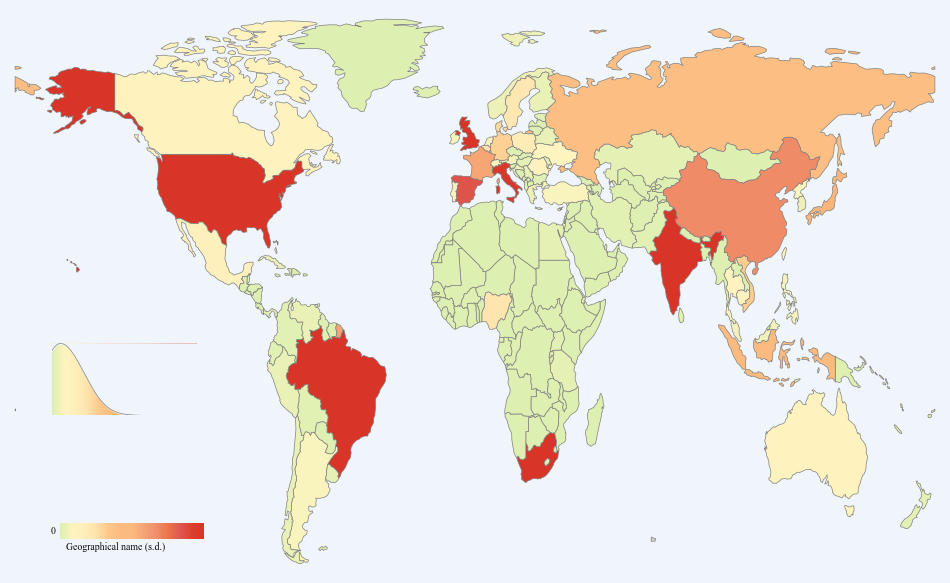

In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import matplotlib as mpl
from scipy.interpolate import make_interp_spline
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

import matplotlib.font_manager as fm
fm.fontManager.addfont('/home/qiuyang/workplace/world_map_drawing/Geographical heterogeneity/Geomap/bokeh-app/data/font/times.ttf')

shapefile = '/home/qiuyang/workplace/world_map_drawing/Geographical heterogeneity/Geomap/bokeh-app/data/countries_110m/ne_110m_admin_0_countries.shp'

#Read shapefile using Geopandas
gdf = gpd.read_file(shapefile)[['ADMIN', 'ADM0_A3', 'geometry']]

#Rename columns.
gdf.columns = ['country', 'country_code', 'geometry']
gdf = gdf.drop(gdf.index[159]) # The width of the map

# print(gdf)

# #Drop row corresponding to 'Antarctica'
datafile = '/home/qiuyang/workplace/world_map_drawing/Geographical heterogeneity/Geomap/bokeh-app/data/Geographical name_normalization.csv'
data=pd.read_csv(datafile,usecols=[0,1,2,3],names=['country','normalization','number','count'])# import data
print(data['normalization'])

#Read data to json.
data = gpd.GeoDataFrame(data)
merged = gdf.merge(data,on = 'country',how='left')

print(merged)

#low -> high
colorslist = ['#DDEFB1','#FEF4C0','#FEEEBA','#FEE1AA','#FDC68A','#FBBB7F','#FBBA7E','#F5A374','#EF8F6B','#EB7547','#DF5952','#DC402D','#D83428']
mycmaps = colors.LinearSegmentedColormap.from_list('mylist',colorslist,N=100)

color_bin = np.arange(0,0.5,0.001)
# print(color_bin)
fig,ax = plt.subplots(figsize = (12,8))

merged['coords'] = merged['geometry'].apply(lambda x: x.representative_point().coords[0])

merged.plot(
    column = 'normalization',
    scheme = 'userdefined',
    classification_kwds = {'bins':color_bin},
    cmap = mycmaps,
    edgecolor = 'gray',
    linewidth = 0.5,
    ax = ax,
    missing_kwds={"color":"lightgray","edgecolor": "gray"}
)


plt.xlim(-182,182)
plt.ylim(-58,86)

plt.axis('off')  # Get rid of the axes
# background color
fig.set_facecolor("#EFF5FA")
# Colorbar label
plt.text(-113,-48,'>0.5',family = 'Times New Roman',fontsize = 7)
plt.text(-166,-48,'0',family = 'Times New Roman',fontsize = 7)
plt.text(-140,-48,'0.25',family = 'Times New Roman',fontsize = 7)
plt.text(-160,-52,'Geographical name (s.d.)',family = 'Times New Roman',fontsize = 7)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

# colorbar
sm = plt.cm.ScalarMappable(cmap=mycmaps)
position=fig.add_axes([0.167, 0.185, 0.12, 0.02])# position[xmin,xmax,ymin,ymax]
cb=plt.colorbar(sm,cax=position,orientation='horizontal',drawedges=False)#The direction of colorbar
cb.outline.set_visible(False)
cb.set_ticks([])  # Get rid of the scale

# Box figure
ax1 = fig.add_axes([0.162,0.165,0.128,0.11])# position[xmin,xmax,ymin,ymax]

# f = ax1.boxplot(
#     # The drawing data
#     x = data['normalization'][5:151],
#     vert = False,
#     widths=0.18,
#     patch_artist=True,
#     boxprops = {'color':'gray','facecolor':'white','linewidth':'0.5'},
#     showcaps=False,
#     flierprops = {'marker':'o','markerfacecolor':'black','color':'black','markersize':'0.5'},
#     medianprops= {'linestyle':'-','color':'gray','linewidth':'0.5'},
#     whiskerprops={'color':'gray','linewidth':'0.5'}
#     )

ax1.axis('off')  # Get rid of the scale

x = data['number'][0:10]
y = data['count'][0:10]
# Use scipy. Interpolate. Spline to fit the curve
x_new = np.linspace(x.min(),x.max(),300) #300 represents number of points to make between x.min and x.max
y_smooth = make_interp_spline(x,y)(x_new)

# Normal distribution diagram
ax2 = fig.add_axes([0.16,0.34,0.12,0.09])# position[xmin,xmax,ymin,ymax]
ax2.set(xlim=(0,max(x_new)), ylim=(-0.003,max(y_smooth)+0.001), autoscale_on=False)
# Color mapping fills the area under the curve
a = np.array([color_bin,color_bin])
ax2.imshow(a, interpolation='bicubic', extent=(0,max(x_new), -0.003,max(y_smooth)),cmap=mycmaps,aspect='auto')
# The background color fills part of the area on the curve
ax2.fill_between(x_new,y_smooth,max(y_smooth),color='#EFF5FA')
ax2.plot(x_new,y_smooth,color='gray',linestyle='-',linewidth=0.5)
ax2.axis('off')  # Get rid of the scale



In [2]:
import geopandas as gpd

# 读取 shapefile 文件

shapefile = '/home/qiuyang/workplace/world_map_drawing/ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp'

#Read shapefile using Geopandas
gdf = gpd.read_file(shapefile)[['ADMIN', 'ADM0_A3', 'geometry']]

#Rename columns.
gdf.columns = ['country', 'country_code', 'geometry']
gdf = gdf.drop(gdf.index[159]) # The width of the map

country_list = [] 
# 遍历 'country' 列并打印每个值
for country in gdf['country']:
    country_list.append(country)

print(country_list)



['Fiji', 'United Republic of Tanzania', 'Western Sahara', 'Canada', 'United States of America', 'Kazakhstan', 'Uzbekistan', 'Papua New Guinea', 'Indonesia', 'Argentina', 'Chile', 'Democratic Republic of the Congo', 'Somalia', 'Kenya', 'Sudan', 'Chad', 'Haiti', 'Dominican Republic', 'Russia', 'The Bahamas', 'Falkland Islands', 'Norway', 'Greenland', 'French Southern and Antarctic Lands', 'East Timor', 'South Africa', 'Lesotho', 'Mexico', 'Uruguay', 'Brazil', 'Bolivia', 'Peru', 'Colombia', 'Panama', 'Costa Rica', 'Nicaragua', 'Honduras', 'El Salvador', 'Guatemala', 'Belize', 'Venezuela', 'Guyana', 'Suriname', 'France', 'Ecuador', 'Puerto Rico', 'Jamaica', 'Cuba', 'Zimbabwe', 'Botswana', 'Namibia', 'Senegal', 'Mali', 'Mauritania', 'Benin', 'Niger', 'Nigeria', 'Cameroon', 'Togo', 'Ghana', 'Ivory Coast', 'Guinea', 'Guinea-Bissau', 'Liberia', 'Sierra Leone', 'Burkina Faso', 'Central African Republic', 'Republic of the Congo', 'Gabon', 'Equatorial Guinea', 'Zambia', 'Malawi', 'Mozambique', 'e

In [76]:
x = data['number'][0:10]
y = data['count'][0:10]
# Use scipy. Interpolate. Spline to fit the curve
x_new = np.linspace(x.min(),x.max(),300) #300 represents number of points to make between x.min and x.max
y_smooth = make_interp_spline(x,y)(x_new)
fig, ax2=plt.subplots(1,1,figsize=[100, 40])
# Normal distribution diagram
ax2 = fig.add_axes([0.16,0.34,0.12,0.09])# position[xmin,xmax,ymin,ymax]
ax2.set(xlim=(0,max(x_new)), ylim=(-0.003,max(y_smooth)+0.001), autoscale_on=False)
# Color mapping fills the area under the curve
a = np.array([color_bin,color_bin])
ax2.imshow(a, interpolation='bicubic', extent=(0,max(x_new), -0.003,max(y_smooth)),cmap=mycmaps,aspect='auto')
# The background color fills part of the area on the curve
ax2.fill_between(x_new,y_smooth,max(y_smooth),color='#EFF5FA')
ax2.plot(x_new,y_smooth,color='gray',linestyle='-',linewidth=0.5)
ax2.axis('off')  # Get rid of the scale

plt.show()
plt.savefig('/home/qiuyang/workplace/world_map_drawing/Geographical heterogeneity/figures/result_mycmaps_dpi=150.jpg', bbox_inches='tight', pad_inches = 0,dpi=150)
# plt.savefig('picture/result_mycmaps_dpi=150.png', bbox_inches='tight', pad_inches = 0,dpi=150)
# plt.savefig('picture/result_mycmaps_dpi=150.tiff', bbox_inches='tight', pad_inches = 0,dpi=150)

KeyError: 'number'

In [3]:
# 打开文本文件
with open('/home/qiuyang/workplace/world_map_drawing/Geographical heterogeneity/draw_data/lhg_country_name(1gai).txt', 'r', encoding='utf-8') as file:
    # 逐行读取文件，并将每一行添加到列表中
    lines = [line.strip() for line in file.readlines()]

# 打印列表中的内容（可选）
print(lines)

zhuan_dict = {"The Democratic Republic of Congo":"Democratic Republic of the Congo",
              "Congo":"Republic of the Congo",
              "Bahamas":"The Bahamas",
              "the Comoros":"Comoros",
              "Eswatini":"eSwatini",
              "Côte d'Ivoire":"Cote d'Ivoire",
              "Micronesia":'Micronesia, Fed. St. ',
              "Serbia":"Republic of Serbia",
              "Tanzania":"United Republic of Tanzania",
              "Türkiye":"Turkey",
              "Antigua and Barbuda":"Antigua & Barbuda ",
              "Saint Kitts and Nevis":"Saint Kitts & Nevis",
              "the United States":"United States of America",
              "Sao Tome and Principe":"Sao Tome & Principe",
              "Timor-Leste":"East Timor",
              }

zhuanhuahou = []
for country in lines:
    if country in zhuan_dict:
        zhuanhuahou.append(zhuan_dict[country])
    else:
        zhuanhuahou.append(country)

import csv

# 创建一个空列表来保存第一列的数据
first_column = []

# 打开 CSV 文件
with open('/home/qiuyang/workplace/world_map_drawing/Geographical heterogeneity/Geomap/bokeh-app/data/Geographical name_normalization.csv', 'r', newline='', encoding='utf-8') as csvfile:
    # 使用 csv.reader 读取 CSV 文件
    csv_reader = csv.reader(csvfile)
    # 逐行读取 CSV 文件
    for row in csv_reader:
        # 将每一行的第一列数据添加到列表中
        first_column.append(row[0])

# 打印第一列的数据（可选）
print(first_column)

meichuxian = []

for country in zhuanhuahou:
    if country not in first_column:
        meichuxian.append(country)

print(len(zhuanhuahou))



['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cape Verde', 'Cambodia', 'Cameroon', 'Canada', 'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'the Comoros', 'Congo', 'Costa Rica', "Côte d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czech Republic', 'North Korea', 'The Democratic Republic of Congo', 'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Honduras', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran', 

0        34
1       346
2       152
3        21
4      3058
       ... 
198       0
199       0
200       0
201       0
202       0
Name: normalization, Length: 203, dtype: int64
                         country country_code  \
0                           Fiji          FJI   
1    United Republic of Tanzania          TZA   
2                 Western Sahara          SAH   
3                         Canada          CAN   
4       United States of America          USA   
..                           ...          ...   
171           Republic of Serbia          SRB   
172                   Montenegro          MNE   
173                       Kosovo          KOS   
174          Trinidad and Tobago          TTO   
175                  South Sudan          SDS   

                                              geometry  normalization  
0    MULTIPOLYGON (((180.00000 -16.06713, 180.00000...              8  
1    POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...             25  
2    POLYGON ((-

(0.0, 1.0, 0.0, 1.0)

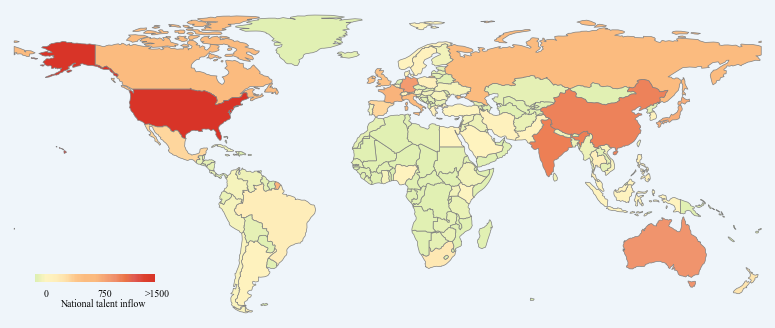

In [30]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import matplotlib as mpl
from scipy.interpolate import make_interp_spline
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

import matplotlib.font_manager as fm
fm.fontManager.addfont('/home/qiuyang/workplace/world_map_drawing/Geographical heterogeneity/Geomap/bokeh-app/data/font/times.ttf')

shapefile = '/home/qiuyang/workplace/world_map_drawing/Geographical heterogeneity/Geomap/bokeh-app/data/countries_110m/ne_110m_admin_0_countries.shp'

#Read shapefile using Geopandas
gdf = gpd.read_file(shapefile)[['ADMIN', 'ADM0_A3', 'geometry']]

#Rename columns.
gdf.columns = ['country', 'country_code', 'geometry']
gdf = gdf.drop(gdf.index[159]) # The width of the map

# print(gdf)

# #Drop row corresponding to 'Antarctica'
datafile = '/home/qiuyang/workplace/world_map_drawing/Geographical heterogeneity/Geomap/bokeh-app/data/chudu.csv'
data=pd.read_csv(datafile,usecols=[0,1],names=['country','normalization'])# import data
print(data['normalization'])

#Read data to json.
data = gpd.GeoDataFrame(data)
merged = gdf.merge(data,on = 'country',how='left')

print(merged)

#low -> high
colorslist = ['#DDEFB1','#FEF4C0','#FEEEBA','#FEE1AA','#FDC68A','#FBBB7F','#FBBA7E','#F5A374','#EF8F6B','#EB7547','#DF5952','#DC402D','#D83428']
mycmaps = colors.LinearSegmentedColormap.from_list('mylist',colorslist,N=100)

color_bin = np.arange(0,1000,10)
# print(color_bin)
fig,ax = plt.subplots(figsize = (10,4))

merged['coords'] = merged['geometry'].apply(lambda x: x.representative_point().coords[0])

merged.plot(
    column = 'normalization',
    scheme = 'userdefined',
    classification_kwds = {'bins':color_bin},
    cmap = mycmaps,
    edgecolor = 'gray',
    linewidth = 0.5,
    ax = ax,
    missing_kwds={"color":"lightgray","edgecolor": "gray"}
)


plt.xlim(-182,182)
plt.ylim(-58,86)

plt.axis('off')  # Get rid of the axes
# background color
fig.set_facecolor("#EFF5FA")
# Colorbar label
plt.text(-117,-48,'>1500',family = 'Times New Roman',fontsize = 7)
plt.text(-166,-48,'0',family = 'Times New Roman',fontsize = 7)
plt.text(-140,-48,'750',family = 'Times New Roman',fontsize = 7)
plt.text(-158,-53,'National talent inflow',family = 'Times New Roman',fontsize = 7)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

# colorbar
sm = plt.cm.ScalarMappable(cmap=mycmaps)
position=fig.add_axes([0.16, 0.20, 0.12, 0.02])# position[xmin,xmax,ymin,ymax]
cb=plt.colorbar(sm,cax=position,orientation='horizontal',drawedges=False)#The direction of colorbar
cb.outline.set_visible(False)
cb.set_ticks([])  # Get rid of the scale

# Box figure
ax1 = fig.add_axes([0.162,0.165,0.128,0.11])# position[xmin,xmax,ymin,ymax]

ax1.axis('off')  # Get rid of the scale




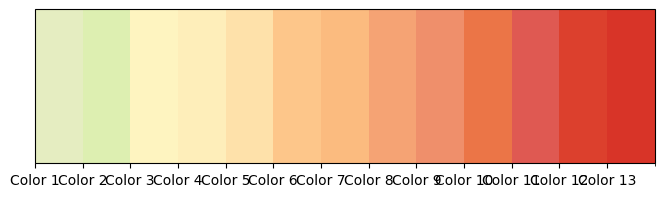

In [62]:
import matplotlib.pyplot as plt
import numpy as np

# 定义颜色列表
colorslist = ['#E5EDC1','#DDEFB1','#FEF4C0','#FEEEBA','#FEE1AA','#FDC68A','#FBBB7F','#F5A374','#EF8F6B','#EB7547','#DF5952','#DC402D','#D83428']

# 创建一个图像和轴对象
fig, ax = plt.subplots(figsize=(8, 2))

# 创建一个颜色映射
cmap = plt.cm.colors.ListedColormap(colorslist)

# 创建一个规范化对象
norm = plt.cm.colors.BoundaryNorm(np.arange(len(colorslist) + 1), cmap.N)

# 创建颜色条
cb = plt.colorbar(
    plt.cm.ScalarMappable(norm=norm, cmap=cmap),
    cax=ax,
    orientation='horizontal',
    ticks=np.arange(len(colorslist)),
    boundaries=np.arange(len(colorslist) + 1) - 0.5
)

# 设置颜色条的标签
cb.set_ticklabels([f'Color {i+1}' for i in range(len(colorslist))])

# 显示图像
plt.show()


                         country country_code  \
0                           Fiji          FJI   
1    United Republic of Tanzania          TZA   
2                 Western Sahara          SAH   
3                         Canada          CAN   
4       United States of America          USA   
..                           ...          ...   
171           Republic of Serbia          SRB   
172                   Montenegro          MNE   
173                       Kosovo          KOS   
174          Trinidad and Tobago          TTO   
175                  South Sudan          SDS   

                                              geometry  normalization  
0    MULTIPOLYGON (((180.00000 -16.06713, 180.00000...          461.0  
1    POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...         1210.0  
2    POLYGON ((-8.66559 27.65643, -8.66512 27.58948...            NaN  
3    MULTIPOLYGON (((-122.84000 49.00000, -122.9742...        20788.0  
4    MULTIPOLYGON (((-122.84000 49.00000, -120.0000

(-60.0, 90.0)

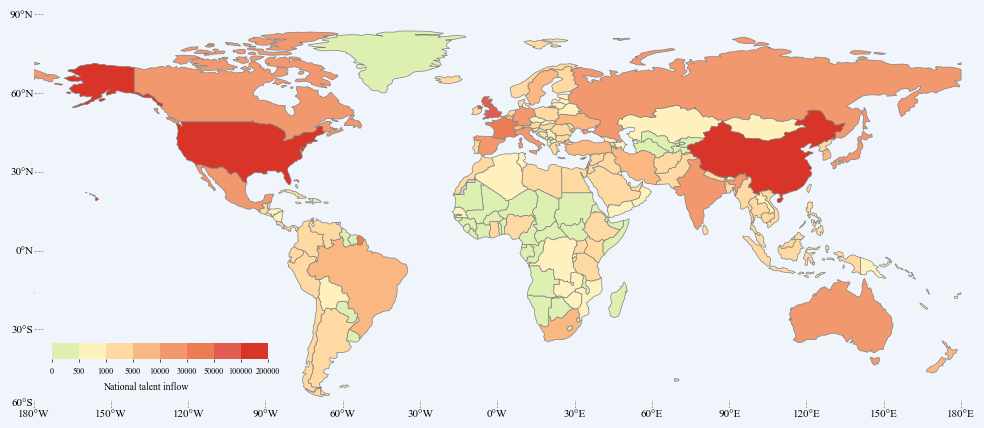

In [86]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import matplotlib as mpl
from scipy.interpolate import make_interp_spline
import os
import matplotlib.cm as cm
from matplotlib.transforms import Bbox
os.environ['KMP_DUPLICATE_LIB_OK']='True'

import matplotlib.font_manager as fm
fm.fontManager.addfont('/home/qiuyang/workplace/world_map_drawing/Geographical heterogeneity/Geomap/bokeh-app/data/font/times.ttf')

shapefile = '/home/qiuyang/workplace/world_map_drawing/Geographical heterogeneity/Geomap/bokeh-app/data/countries_110m/ne_110m_admin_0_countries.shp'

#Read shapefile using Geopandas
gdf = gpd.read_file(shapefile)[['ADMIN', 'ADM0_A3', 'geometry']]

#Rename columns.
gdf.columns = ['country', 'country_code', 'geometry']
gdf = gdf.drop(gdf.index[159]) # The width of the map

# print(gdf)

# #Drop row corresponding to 'Antarctica'
datafile = '/home/qiuyang/workplace/world_map_drawing/Geographical heterogeneity/Geomap/bokeh-app/data/rudu1.csv'
data=pd.read_csv(datafile,usecols=[0,1],names=['country','normalization'])# import data
# 遍历每一行并打印normalization列的值


#Read data to json.
data = gpd.GeoDataFrame(data)
merged = gdf.merge(data,on = 'country',how='left')
print(merged)
# print(merged)

# print(color_bin)
fig,ax = plt.subplots(figsize = (12,8))

merged['coords'] = merged['geometry'].apply(lambda x: x.representative_point().coords[0])

#我的色带
# color_bin = np.arange(0,1000,10)
color_bin = [0,500,1000,5000,10000,30000,50000,100000,200000]

#low -> high
colorslist = ['#DDEFB1','#FEF4C0','#FEE1AA','#FDC68A','#F5A374','#EF8F6B','#EB7547','#DF5952','#D83428']
# colorslist = ['#DDEFB1','#FEF4C0','#FEEEBA','#FEE1AA','#FDC68A','#FBBB7F','#F5A374','#EF8F6B','#EB7547','#DF5952','#DC402D','#D83428']
mycmaps = colors.LinearSegmentedColormap.from_list('mylist',colorslist,N=8)

merged.plot(
    column = 'normalization',
    scheme = 'userdefined',
    classification_kwds = {'bins':color_bin},
    cmap = mycmaps,
    edgecolor = 'gray',
    linewidth = 0.5,
    ax = ax,
    missing_kwds={"color":"lightgray","edgecolor": "gray"}
)


plt.xlim(-182,182)
plt.ylim(-90,90)

plt.axis('off')  # Get rid of the axes
# background color
fig.set_facecolor("#EFF5FA")
# Colorbar label
# plt.text(-117,-48,'>1500',family = 'Times New Roman',fontsize = 7)
# plt.text(-166,-48,'0',family = 'Times New Roman',fontsize = 7)
# plt.text(-140,-48,'750',family = 'Times New Roman',fontsize = 7)
plt.text(-153,-53,'National talent inflow',family = 'Times New Roman',fontsize = 7)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)


# # colorbar
# norm = plt.Normalize(vmin=0, vmax=1001)
# sm = plt.cm.ScalarMappable(cmap=mycmaps,norm=norm)
# position=fig.add_axes([0.16, 0.31, 0.12, 0.02])# position[xmin,xmax,ymin,ymax]
# cb=plt.colorbar(sm,cax=position,orientation='horizontal',drawedges=False)#The direction of colorbar
# cb.outline.set_visible(False)


# colorbar
bins = [0,500,1000,5000,10000,30000,50000,100000,200000]
nbin = len(colorslist) - 1
# cmap4 = mpl.colors.ListedColormap(colorslist)

norm4 = mpl.colors.BoundaryNorm(bins, nbin)
im4 = mpl.cm.ScalarMappable(norm=norm4, cmap=mycmaps)
position=fig.add_axes([0.14, 0.31, 0.18, 0.02]) # outflow 
# position=fig.add_axes([0.14, 0.195, 0.18, 0.02])  # inflow
cb = fig.colorbar(
    im4, cax=position, orientation='horizontal',drawedges=False
)
cb.outline.set_visible(False)


# 设置刻度位置和标签
cb.set_ticks([0,500,1000,5000,10000,30000,50000,100000,200000])
cb.set_ticklabels(['0','500','1000','5000','10000','30000','50000','100000','200000'])

# 调整刻度大小和字体
cb.ax.tick_params(labelsize=6, length=2, width=0.5, labelfontfamily='Times New Roman')


# cb.set_ticks([])  # Get rid of the scale


# 绘制经度线
longitudes = np.arange(-180, 181, 30)
for lon in longitudes:
    ax.axvline(x=lon, color='gray', linestyle='--', linewidth=0.5,ymax=0.02)
    lon_label = str(lon) + "°E" if lon > 0 else str(-lon) + "°W"
    ax.text(lon, -60, lon_label, va='top', ha='center', fontsize=8,family = 'Times New Roman')

# 绘制纬度线
latitudes = np.arange(-60, 91, 30)
for lat in latitudes:   
    ax.axhline(y=lat, color='gray', linestyle='--', linewidth=0.5,xmax=0.01)
    lat_label = str(lat) + "°N" if lat >= 0 else str(-lat) + "°S"
    if lat == -60:
        ax.text(-180, lat+4, lat_label, va='top', ha='right', fontsize=8,family = 'Times New Roman')
    else:
        ax.text(-180, lat, lat_label, va='center', ha='right', fontsize=8,family = 'Times New Roman')

# 设置刻度范围
ax.set_xlim(-180, 181)
ax.set_ylim(-60, 90)


# # 调整刻度字的位置
# ax.xaxis.set_label_coords(5, 5)
# ax.yaxis.set_label_coords(-0.1, 0.5)



0        28
1      3934
2       541
3        27
4        31
       ... 
208       0
209       0
210       0
211       0
212       0
Name: normalization, Length: 213, dtype: int64


(-60.0, 90.0)

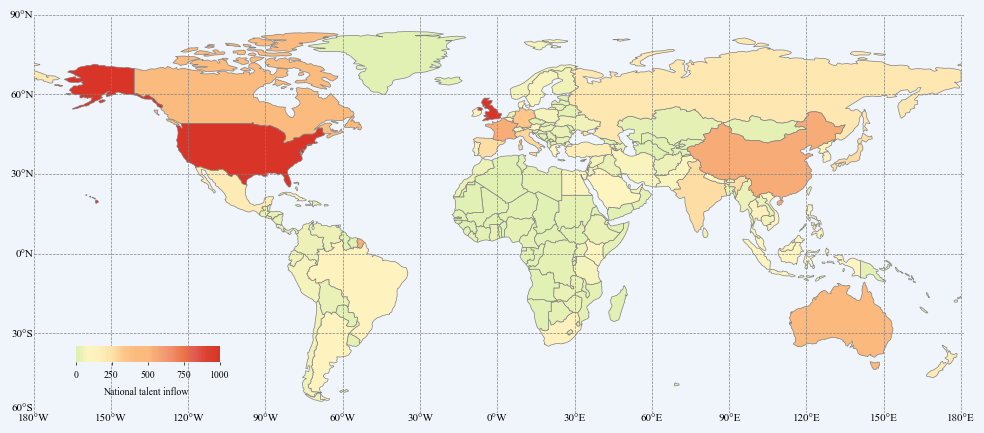

In [38]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import matplotlib as mpl
from scipy.interpolate import make_interp_spline
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

import matplotlib.font_manager as fm
fm.fontManager.addfont('/home/qiuyang/workplace/world_map_drawing/Geographical heterogeneity/Geomap/bokeh-app/data/font/times.ttf')

shapefile = '/home/qiuyang/workplace/world_map_drawing/Geographical heterogeneity/Geomap/bokeh-app/data/countries_110m/ne_110m_admin_0_countries.shp'

#Read shapefile using Geopandas
gdf = gpd.read_file(shapefile)[['ADMIN', 'ADM0_A3', 'geometry']]

#Rename columns.
gdf.columns = ['country', 'country_code', 'geometry']
gdf = gdf.drop(gdf.index[159]) # The width of the map

# print(gdf)

# #Drop row corresponding to 'Antarctica'
datafile = '/home/qiuyang/workplace/world_map_drawing/Geographical heterogeneity/Geomap/bokeh-app/data/rudu.csv'
data=pd.read_csv(datafile,usecols=[0,1],names=['country','normalization'])# import data
print(data['normalization'])

#Read data to json.
data = gpd.GeoDataFrame(data)
merged = gdf.merge(data,on = 'country',how='left')

# print(merged)

# print(color_bin)
fig,ax = plt.subplots(figsize = (12,8))

merged['coords'] = merged['geometry'].apply(lambda x: x.representative_point().coords[0])

#我的色带
color_bin = np.arange(0,1000,10)

#low -> high
colorslist = ['#DDEFB1','#FEF4C0','#FEEEBA','#FEE1AA','#FDC68A','#FBBB7F','#FBBA7E','#F5A374','#EF8F6B','#EB7547','#DF5952','#DC402D','#D83428']
mycmaps = colors.LinearSegmentedColormap.from_list('mylist',colorslist,N=100)

merged.plot(
    column = 'normalization',
    scheme = 'userdefined',
    classification_kwds = {'bins':color_bin},
    cmap = mycmaps,
    edgecolor = 'gray',
    linewidth = 0.5,
    ax = ax,
    missing_kwds={"color":"lightgray","edgecolor": "gray"}
)


plt.xlim(-182,182)
plt.ylim(-90,90)

plt.axis('off')  # Get rid of the axes
# background color
fig.set_facecolor("#EFF5FA")
# Colorbar label
# plt.text(-117,-48,'>1500',family = 'Times New Roman',fontsize = 7)
# plt.text(-166,-48,'0',family = 'Times New Roman',fontsize = 7)
# plt.text(-140,-48,'750',family = 'Times New Roman',fontsize = 7)
plt.text(-153,-53,'National talent inflow',family = 'Times New Roman',fontsize = 7)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)


# colorbar
norm = plt.Normalize(vmin=1, vmax=1001)

sm = plt.cm.ScalarMappable(cmap=mycmaps,norm=norm)
position=fig.add_axes([0.16, 0.31, 0.12, 0.02])# position[xmin,xmax,ymin,ymax]
cb=plt.colorbar(sm,cax=position,orientation='horizontal',drawedges=False)#The direction of colorbar
cb.outline.set_visible(False)

# 设置刻度位置和标签
cb.set_ticks([0, 250, 500, 750, 1000])
cb.set_ticklabels(['0', '250', '500', '750', '1000'])

# 调整刻度大小和字体
cb.ax.tick_params(labelsize=7, length=2, width=0.5, labelfontfamily='Times New Roman')

# cb.set_ticks([])  # Get rid of the scale

# 绘制经度线
longitudes = np.arange(-180, 181, 30)
for lon in longitudes:
    ax.axvline(x=lon, color='gray', linestyle='--', linewidth=0.5)
    lon_label = str(lon) + "°E" if lon > 0 else str(-lon) + "°W"
    ax.text(lon, -60, lon_label, va='top', ha='center', fontsize=8,family = 'Times New Roman')

# 绘制纬度线
latitudes = np.arange(-60, 91, 30)
for lat in latitudes:
    ax.axhline(y=lat, color='gray', linestyle='--', linewidth=0.5)
    lat_label = str(lat) + "°N" if lat >= 0 else str(-lat) + "°S"
    if lat == -60:
        ax.text(-180, lat+4, lat_label, va='top', ha='right', fontsize=8,family = 'Times New Roman')
    else:
        ax.text(-180, lat, lat_label, va='center', ha='right', fontsize=8,family = 'Times New Roman')

# 设置刻度范围
ax.set_xlim(-180, 181)
ax.set_ylim(-60, 90)


# # 调整刻度字的位置
# ax.xaxis.set_label_coords(5, 5)
# ax.yaxis.set_label_coords(-0.1, 0.5)

